In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import folium


In [ ]:
data= pd.read_csv('/content/combined_data.csv')
data.head()

District        PS Name     FIR No Date Report  \
0  THIRUVANANTHAPURAM CITY  Vattiyoorkavu  7000/2019  2019-01-13   
1  THIRUVANANTHAPURAM CITY     Vanchiyoor  7001/2019  2019-01-04   
2  THIRUVANANTHAPURAM CITY     Vanchiyoor  7002/2019  2019-01-02   
3  THIRUVANANTHAPURAM CITY     Vanchiyoor  7003/2019  2019-01-02   
4  THIRUVANANTHAPURAM CITY     Vanchiyoor  7004/2019  2019-01-08   

  Date Accident Time Report Time Accident     Sections    Accident type  \
0    2019-12-01    18:00:00      17:30:00  279,337,338     Minor Injury   
1    2019-12-31    11:25:00      06:30:00          279            Fatal   
2    2019-12-24    17:40:00      08:45:00    MO(Minor)  Grevious Injury   
3    2019-01-01    16:13:00      14:15:00  279,337,338  Grevious Injury   
4    2019-01-17    18:15:00      17:45:00  279,337,338  Grevious Injury   

   Death  ...           Spot Accident      Weather         T -Junction  \
0      0  ...           Near bus stop  Sunny/Clear         T- Junction   
1      1  ...  At pedestrian crossing  Sunny/Clear  Staggered junction   
2      0  ...  Market/Commercial area  Sunny/Clear                 NaN   
3      0  ...  Market/Commercial area  Sunny/Clear         T- Junction   
4      0  ...     Near office complex  Sunny/Clear                 NaN   

        Collision         Type Road  Road Features Visibility Traffic Control  \
0   Hit from Back  National Highway  Straight Road       Good    Uncontrolled   
1  Hit Pedestrian  National Highway  Straight Road       Good    Uncontrolled   
2   Hit from Back     State Highway  Straight Road       Good    Uncontrolled   
3   Hit from Back        Other Road    Curved Road       Good    Uncontrolled   
4   Hit from Side     State Highway  Straight Road       Good    Uncontrolled   

  Accussed Vehicle Victim Vehicle  
0           Tipper    Motor Cycle  
1      Motor Cycle    Motor Cycle  
2      Motor Cycle        Scooter  
3    Auto rickshaw    Motor Cycle  
4      Motor Cycle            Car  

[5 rows x 31 columns]

In [ ]:

#Count the number of accidents in each district
district_accidents = data['District'].value_counts().reset_index()
district_accidents.columns = ['District', 'Number of Accidents']

#  Sort the result in descending order
district_accidents_sorted = district_accidents.sort_values(by='Number of Accidents', ascending=False)

#  Display the result
print(district_accidents_sorted)

                    District  Number of Accidents
0            ERNAKULAM RURAL                 1783
1                  ALAPPUZHA                 1568
2   THIRUVANANTHAPURAM RURAL                 1477
3                 MALAPPURAM                 1377
4                   KOTTAYAM                 1247
5                   PALAKKAD                 1178
6             ERNAKULAM CITY                 1108
7             THRISSUR RURAL                 1081
8                KOLLAM CITY                 1045
9              THRISSUR CITY                 1044
10           KOZHIKODE RURAL                 1030
11            KOZHIKODE CITY                  938
12              KOLLAM RURAL                  896
13            PATHANAMTHITTA                  818
14   THIRUVANANTHAPURAM CITY                  758
15               KANNUR CITY                  712
16              KANNUR RURAL                  550
17                    IDUKKI                  533
18                 KASARAGOD                  525


<ipython-input-4-2d847138965e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Accidents', y='District', data=district_accidents_sorted, palette='viridis') # Changed 'district_accident_count' to 'district_accidents_sorted'


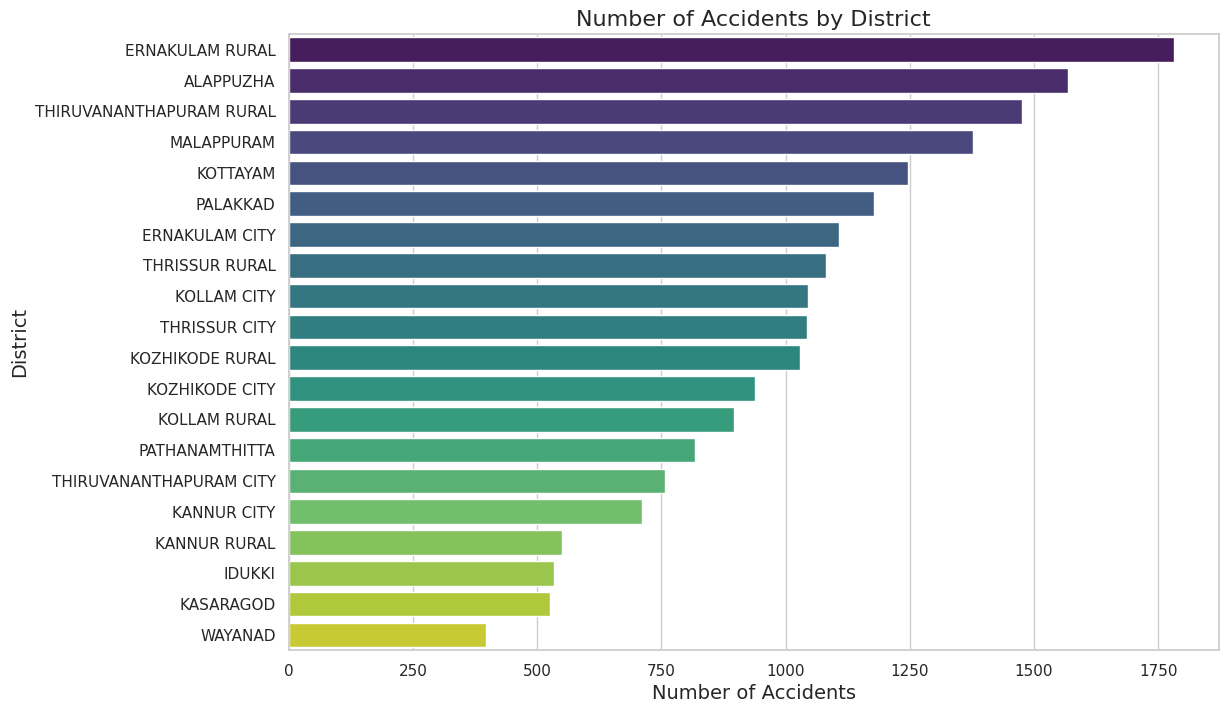

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and set its size
plt.figure(figsize=(12, 8))

# Create a barplot with the districts on the x-axis and accident count on the y-axis
# Use the correct DataFrame name 'district_accidents_sorted' or 'district_accidents'
sns.barplot(x='Number of Accidents', y='District', data=district_accidents_sorted, palette='viridis') # Changed 'district_accident_count' to 'district_accidents_sorted'

# Add labels and a title to the plot
plt.title('Number of Accidents by District', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('District', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Group the dataset by 'PS Name' and count the number of accidents in each police station
ps_accident_count = data.groupby('PS Name').size().reset_index(name='Accident_Count')

# Sort the police stations by the number of accidents in descending order
ps_accident_count = ps_accident_count.sort_values(by='Accident_Count', ascending=False)

# Display the result
ps_accident_count.head(20)



PS Name  Accident_Count
444           Vatakara              168
191     Kottarakkara PS             167
272           Nadakkave             157
270        Muvattupuzha             155
251        Med. College             151
207         Kunnamkulam             148
151   Karunagappally PS             145
18             Angamaly             131
299                Pala             125
188       Kothamangalam             125
2                Adoor              124
404         Thiruvalla              122
205          Kundara PS             122
97           Ettumanoor             120
389         Taliparamba             119
195         Kottiyam PS             114
128         Kallambalam             109
407          Thodupuzha             108
91   Ernakulam Central              107
293        North Parur              107

<ipython-input-6-98f73c082e5d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accident_Count', y='PS Name', data=top_15_ps, palette='magma')


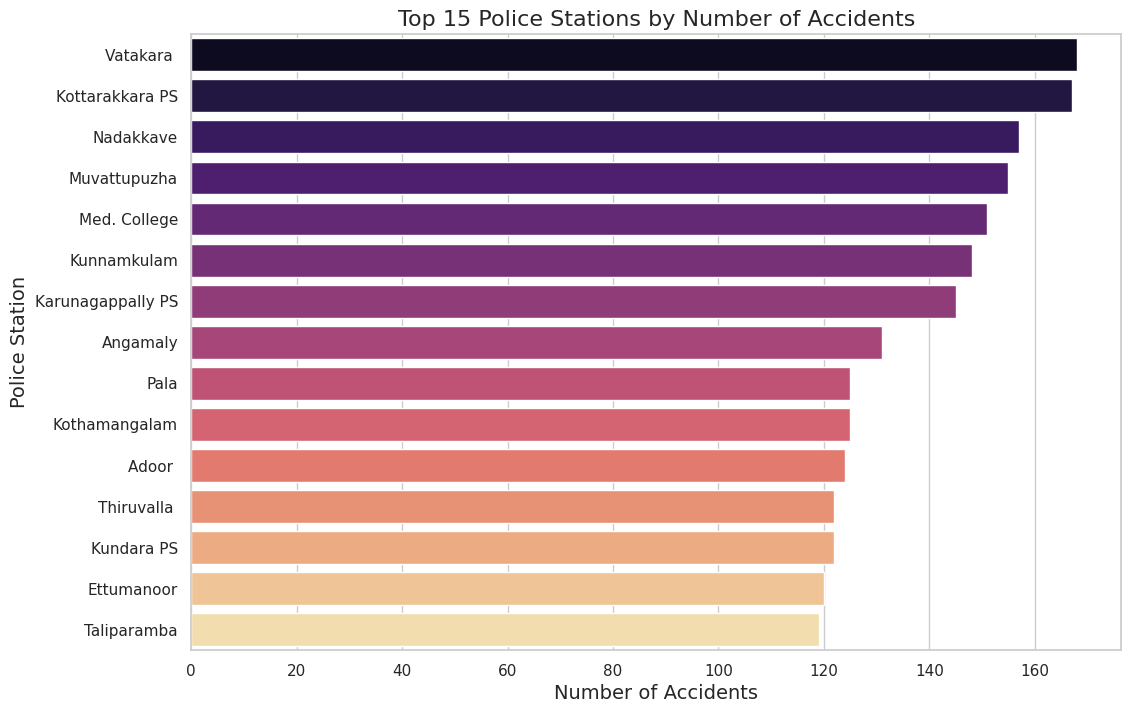

In [ ]:
# Group the dataset by 'PS Name' and count the number of accidents in each police station
ps_accident_count = data.groupby('PS Name').size().reset_index(name='Accident_Count')

# Sort the police stations by the number of accidents in descending order
ps_accident_count = ps_accident_count.sort_values(by='Accident_Count', ascending=False)

# Select the top 15 police stations with the highest number of accidents
top_15_ps = ps_accident_count.head(15)

# Create a figure and set its size
plt.figure(figsize=(12, 8))

# Create a barplot with the PS Names on the y-axis and accident count on the x-axis
sns.barplot(x='Accident_Count', y='PS Name', data=top_15_ps, palette='magma')

# Add labels and a title to the plot
plt.title('Top 15 Police Stations by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Police Station', fontsize=14)

# Show the plot
plt.show()


<ipython-input-7-80b9acc48ebf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spot Accident', y='Accident_Count', data=spot_accident_count, palette='coolwarm')


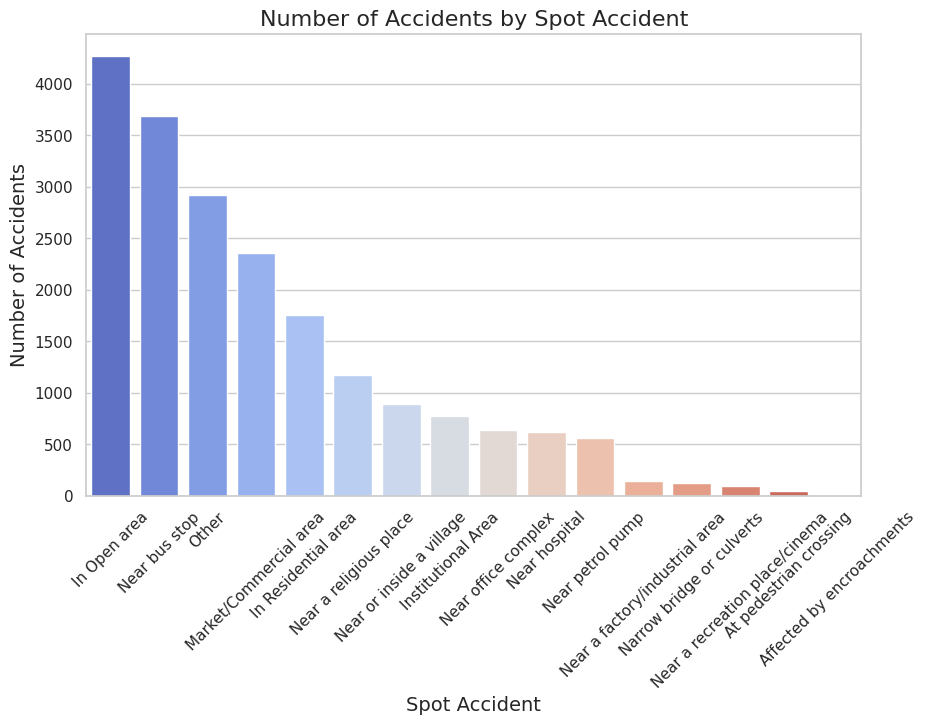

In [ ]:
# Group the dataset by 'Spot Accident' and count the number of accidents in each spot
spot_accident_count = data.groupby('Spot Accident').size().reset_index(name='Accident_Count')

# Sort the spots by accident count in descending order (optional)
spot_accident_count = spot_accident_count.sort_values(by='Accident_Count', ascending=False)

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Create a barplot with the 'Spot Accident' on the x-axis and accident count on the y-axis
sns.barplot(x='Spot Accident', y='Accident_Count', data=spot_accident_count, palette='coolwarm')

# Add labels and a title to the plot
plt.title('Number of Accidents by Spot Accident', fontsize=16)
plt.xlabel('Spot Accident', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Rotate the x-axis labels for better readability (if there are long names)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Group the dataset by 'Place of Occurrence' and count the number of accidents in each place
place_accident_count = data.groupby('Place of Occurance').size().reset_index(name='Accident_Count')

# Sort the places by accident count in descending order (optional)
place_accident_count = place_accident_count.sort_values(by='Accident_Count', ascending=False)

# Display the table
print(place_accident_count)


                        Place of Occurance  Accident_Count
726                             CHANDIROOR              35
5338                        PERINTHALMANNA              32
4967                            PALLIMUKKU              24
6280                         THIRUVANKULAM              23
5377                            PERUMPUZHA              23
...                                    ...             ...
4204  NEAR MUNDERI HIGHER SECONDARY SCHOOL               1
1498                           ICHILAMPADY               1
1497    I URBEN COOP BANK MISSION QUARTERS               1
4208                   NEAR MUPPATHADAM JN               1
0                                   BYPASS               1

[6942 rows x 2 columns]


<ipython-input-9-efd5c876de47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accident_Count', y='Place of Occurance', data=top_15_places, palette='cividis')


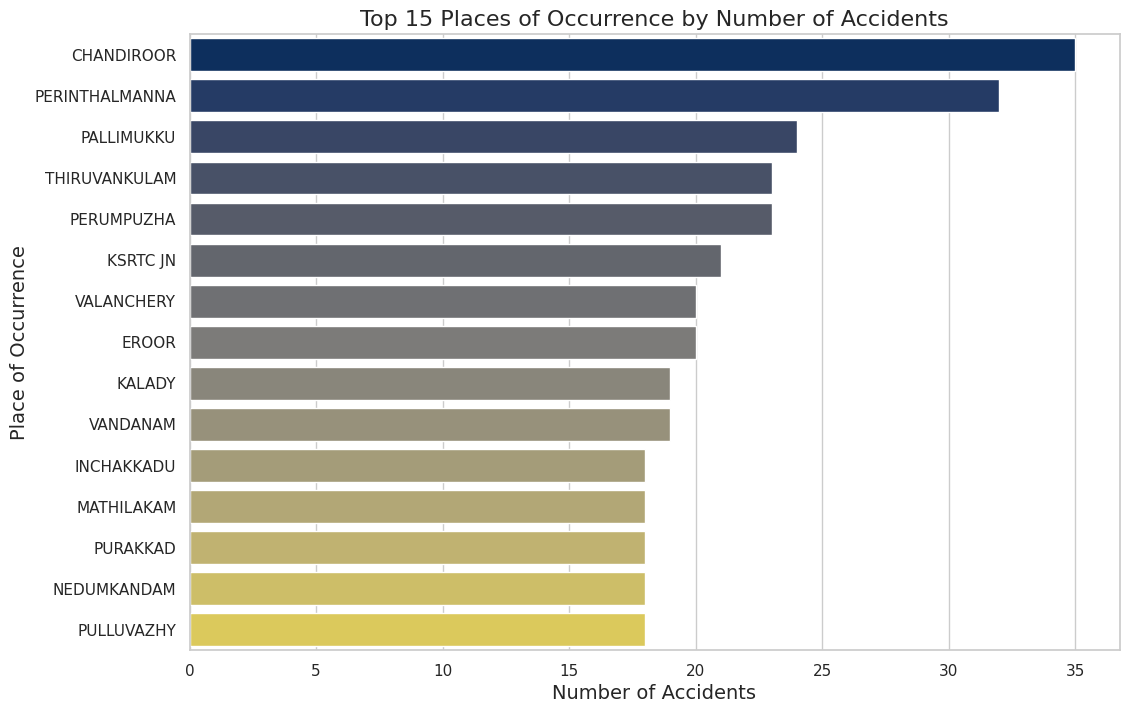

In [ ]:
# Group the dataset by 'Place of Occurrence' and count the number of accidents in each place
place_accident_count = data.groupby('Place of Occurance').size().reset_index(name='Accident_Count')

# Sort the places by accident count in descending order
place_accident_count = place_accident_count.sort_values(by='Accident_Count', ascending=False)

# Select the top 15 places with the highest number of accidents
top_15_places = place_accident_count.head(15)

# Create a figure and set its size
plt.figure(figsize=(12, 8))

# Create a barplot with the top 15 places on the y-axis and accident count on the x-axis
sns.barplot(x='Accident_Count', y='Place of Occurance', data=top_15_places, palette='cividis')

# Add labels and a title to the plot
plt.title('Top 15 Places of Occurrence by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Place of Occurrence', fontsize=14)

# Show the plot
plt.show()


In [ ]:
# prompt: for each value of disrict make a new list containing ps name for that district

district_ps_map = {}
for district in data['District'].unique():
    district_ps_map[district] = list(data[data['District'] == district]['PS Name'].unique())

In [ ]:
#display list
district_ps_map

{'THIRUVANANTHAPURAM CITY': ['Vattiyoorkavu',
  'Vanchiyoor',
  'Thumba',
  'Kazhakkuttom',
  'Thiruvallam',
  'Nemom',
  'Medical College',
  'Poonthura',
  'Peroorkada',
  'Sreekariyam',
  'Fort',
  'Valiyathura',
  'Poojappura',
  'Museum',
  'Vizhinjam',
  'Thampanoor',
  'Cantonment',
  'Pettah',
  'Kovalam',
  'Mannanthala',
  'Karamana'],
 'THIRUVANANTHAPURAM RURAL': ['Kadinamkulam',
  'Varkala',
  'Balaramapuram',
  'Aruvikkara',
  'Chirayinkil',
  'Kattakkada',
  'Attingal',
  'Neyyattinkara',
  'Palode',
  'Vellarada',
  'Pothencode',
  'Vattappara',
  'Maranalloor',
  'Ayiroor ',
  'Pozhiyoor',
  'Kallambalam',
  'Poovar',
  'Kilimanoor',
  'Malayinkil',
  'Mangalapuram',
  'Pangode',
  'Nedumangad',
  'Parassala',
  'Naruvamoodu',
  'Kanjiramkulam',
  'Marayamuttom',
  'Ariyancode',
  'Valiyamala',
  'Anchuthengu ',
  'Venjarammood',
  'Pallickal',
  'Kadakkavoor',
  'Aryanad',
  'Neyyardam',
  'Nagarur',
  'Vilappilsala',
  'Vithura',
  'Ponmudi'],
 'KOLLAM CITY': ['Karuna

In [ ]:
#separate list for each district
for district, ps_list in district_ps_map.items():
    print(f"District: {district}")
    print("PS Names:")
    for ps_name in ps_list:
        print(f"- {ps_name}")
    print()

District: THIRUVANANTHAPURAM CITY
PS Names:
- Vattiyoorkavu
- Vanchiyoor
- Thumba
- Kazhakkuttom
- Thiruvallam
- Nemom
- Medical College
- Poonthura
- Peroorkada
- Sreekariyam
- Fort
- Valiyathura
- Poojappura
- Museum
- Vizhinjam
- Thampanoor
- Cantonment
- Pettah
- Kovalam
- Mannanthala
- Karamana

District: THIRUVANANTHAPURAM RURAL
PS Names:
- Kadinamkulam
- Varkala
- Balaramapuram
- Aruvikkara
- Chirayinkil
- Kattakkada
- Attingal
- Neyyattinkara
- Palode
- Vellarada
- Pothencode
- Vattappara
- Maranalloor
- Ayiroor 
- Pozhiyoor
- Kallambalam
- Poovar
- Kilimanoor
- Malayinkil
- Mangalapuram
- Pangode
- Nedumangad
- Parassala
- Naruvamoodu
- Kanjiramkulam
- Marayamuttom
- Ariyancode
- Valiyamala
- Anchuthengu 
- Venjarammood
- Pallickal
- Kadakkavoor
- Aryanad
- Neyyardam
- Nagarur
- Vilappilsala
- Vithura
- Ponmudi

District: KOLLAM CITY
PS Names:
- Karunagappally PS
- Kottiyam PS
- Eravipuram
- Paravoor PS
- Kilikollur PS
- Pallithottam PS
- Kannanelure PS
- Chavara PS
- Sakthiku

In [ ]:
#show all the columns
pd.set_option('display.max_columns', None)
data.head(3)

District        PS Name     FIR No Date Report  \
0  THIRUVANANTHAPURAM CITY  Vattiyoorkavu  7000/2019  2019-01-13   
1  THIRUVANANTHAPURAM CITY     Vanchiyoor  7001/2019  2019-01-04   
2  THIRUVANANTHAPURAM CITY     Vanchiyoor  7002/2019  2019-01-02   

  Date Accident Time Report Time Accident     Sections    Accident type  \
0    2019-12-01    18:00:00      17:30:00  279,337,338     Minor Injury   
1    2019-12-31    11:25:00      06:30:00          279            Fatal   
2    2019-12-24    17:40:00      08:45:00    MO(Minor)  Grevious Injury   

   Death  Grievous  Minor  Pedestrian  Cyclist   Latitude  Longitude  \
0      0         0      2           0        0  10.190200  76.200200   
1      1         0      0           1        0  10.107051  76.261841   
2      0         1      0           0        0   9.942077  76.644036   

  Place of Occurance Type Area City/Town/ Village Lanes Road Divider  \
0       MOOTHAKUNNAM     Rural            Village     Single      no   
1          KAVILNADA     Rural            Village     Double      no   
2         VAZHAKULAM     Rural               Town     Double      no   

            Spot Accident      Weather         T -Junction       Collision  \
0           Near bus stop  Sunny/Clear         T- Junction   Hit from Back   
1  At pedestrian crossing  Sunny/Clear  Staggered junction  Hit Pedestrian   
2  Market/Commercial area  Sunny/Clear                 NaN   Hit from Back   

          Type Road  Road Features Visibility Traffic Control  \
0  National Highway  Straight Road       Good    Uncontrolled   
1  National Highway  Straight Road       Good    Uncontrolled   
2     State Highway  Straight Road       Good    Uncontrolled   

  Accussed Vehicle Victim Vehicle  
0           Tipper    Motor Cycle  
1      Motor Cycle    Motor Cycle  
2      Motor Cycle        Scooter

In [ ]:
data.shape

(20066, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20066 entries, 0 to 20065
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            20066 non-null  object 
 1   PS Name             20066 non-null  object 
 2   FIR No              20066 non-null  object 
 3   Date Report         20066 non-null  object 
 4   Date Accident       20066 non-null  object 
 5   Time Report         20066 non-null  object 
 6   Time Accident       20066 non-null  object 
 7   Sections            20066 non-null  object 
 8   Accident type       20066 non-null  object 
 9   Death               20066 non-null  int64  
 10  Grievous            20066 non-null  int64  
 11  Minor               20066 non-null  int64  
 12  Pedestrian          20066 non-null  int64  
 13  Cyclist             20066 non-null  int64  
 14  Latitude            20066 non-null  float64
 15  Longitude           20066 non-null  float64
 16  Plac

In [ ]:
data.columns

Index(['District', 'PS Name', 'FIR No', 'Date Report', 'Date Accident',
       'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death',
       'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude',
       'Place of Occurance', 'Type Area', 'City/Town/ Village', 'Lanes Road',
       'Divider', 'Spot Accident', 'Weather', 'T -Junction', 'Collision',
       'Type Road', 'Road Features', 'Visibility', 'Traffic Control',
       'Accussed Vehicle', 'Victim Vehicle'],
      dtype='object')

In [ ]:
data.describe()

Death      Grievous         Minor    Pedestrian       Cyclist  \
count  20066.000000  20066.000000  20066.000000  20066.000000  20066.000000   
mean       0.096731      0.802302      0.331506      0.224958      0.022725   
std        0.309276      0.537121      0.776134      0.438977      0.152990   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        5.000000      6.000000     35.000000      6.000000      2.000000   

           Latitude     Longitude  
count  20066.000000  20066.000000  
mean      10.168907     76.329663  
std        1.073681      0.468272  
min        8.300073     74.875478  
25%        9.288573     76.072254  
50%       10.053988     76.353447  
75%       10.994741     76.662090  
max       12.774833     77.215566

In [ ]:
data.isna().sum()

District                  0
PS Name                   0
FIR No                    0
Date Report               0
Date Accident             0
Time Report               0
Time Accident             0
Sections                  0
Accident type             0
Death                     0
Grievous                  0
Minor                     0
Pedestrian                0
Cyclist                   0
Latitude                  0
Longitude                 0
Place of Occurance        0
Type Area                 0
City/Town/ Village        0
Lanes Road                0
Divider                   0
Spot Accident             0
Weather                   0
T -Junction           14596
Collision                 0
Type Road                 0
Road Features             0
Visibility                0
Traffic Control           0
Accussed Vehicle          0
Victim Vehicle            0
dtype: int64

In [ ]:
#drop T-junction
data= data.drop('T -Junction', axis=1)

In [ ]:
data.columns

Index(['District', 'PS Name', 'FIR No', 'Date Report', 'Date Accident',
       'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death',
       'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude',
       'Place of Occurance', 'Type Area', 'City/Town/ Village', 'Lanes Road',
       'Divider', 'Spot Accident', 'Weather', 'Collision', 'Type Road',
       'Road Features', 'Visibility', 'Traffic Control', 'Accussed Vehicle',
       'Victim Vehicle'],
      dtype='object')

In [ ]:
data.shape

(20066, 30)

In [ ]:
data['Accident type'].value_counts()

Accident type
Grevious Injury    14756
Minor Injury        2867
Fatal               1856
Non Injury           587
Name: count, dtype: int64

In [ ]:
data['Spot Accident'].value_counts()

Spot Accident
In Open area                      4269
Near bus stop                     3682
Other                             2917
Market/Commercial area            2359
In Residential area               1754
Near a religious place            1175
Near or inside a village           892
Institutional Area                 774
Near office complex                636
Near hospital                      623
Near petrol pump                   558
Near a factory/industrial area     144
Narrow bridge or culverts          130
Near a recreation place/cinema      94
At pedestrian crossing              47
Affected by encroachments           12
Name: count, dtype: int64

In [ ]:
data['Type Area'].value_counts()

Type Area
Rural    14494
Urban     5572
Name: count, dtype: int64

In [ ]:
data['City/Town/ Village'].value_counts()

City/Town/ Village
Village    13656
Town        3523
City        2887
Name: count, dtype: int64

In [ ]:
data['Lanes Road'].value_counts()

Lanes Road
Single        11913
Double         7269
Four lanes      793
Six lanes        91
Name: count, dtype: int64

In [ ]:
data['Divider'].value_counts()

Divider
no     17441
yes     2625
Name: count, dtype: int64

In [ ]:
data['Spot Accident'].unique()

array(['Near bus stop', 'At pedestrian crossing',
       'Market/Commercial area', 'Near office complex',
       'Near a religious place', 'Institutional Area',
       'In Residential area', 'Other', 'Near hospital', 'In Open area',
       'Near petrol pump', 'Near or inside a village',
       'Near a factory/industrial area', 'Narrow bridge or culverts',
       'Near a recreation place/cinema', 'Affected by encroachments'],
      dtype=object)

In [ ]:
data['District'].unique()

array(['THIRUVANANTHAPURAM CITY', 'THIRUVANANTHAPURAM RURAL',
       'KOLLAM CITY', 'KOLLAM RURAL', 'PATHANAMTHITTA', 'ALAPPUZHA',
       'KOTTAYAM', 'IDUKKI', 'ERNAKULAM CITY', 'ERNAKULAM RURAL',
       'THRISSUR CITY', 'THRISSUR RURAL', 'PALAKKAD', 'MALAPPURAM',
       'KOZHIKODE CITY', 'KOZHIKODE RURAL', 'WAYANAD', 'KANNUR CITY',
       'KASARAGOD', 'KANNUR RURAL'], dtype=object)

In [ ]:
data['Weather'].value_counts()

Weather
Sunny/Clear    16854
Mist/Fog        1484
Cloudy          1366
Very Hot         166
Light rain        66
Snow              58
Dust Storm        34
Very Cold         21
Hail/Sleet        13
Heavy rain         4
Name: count, dtype: int64

In [ ]:
data['Collision'].value_counts()

Collision
Hit Pedestrian                 4451
Head on Collision              3382
Hit from Side                  3264
Hit from Back                  2383
Other                          2162
Hit and run                     969
Skidding                        791
Rear end collision              697
Right-angled collision          584
Right turn collision            470
Overturn                        258
Hit Fix / Stationary Object     199
Run off the Road                150
Collision brush/side swipe      146
With parked vehicle             114
With animal                      46
Name: count, dtype: int64

In [ ]:
data['Type Road'].value_counts()

Type Road
Other Road          11007
State Highway        4378
National Highway     4277
Bypass                279
ODR                    77
MDR                    48
Name: count, dtype: int64

In [ ]:
data['Road Features'].value_counts()

Road Features
Straight Road                            12066
Others                                    5322
Curved Road                               2390
Ongoing Road Works/Under Construction      153
Bridge                                     112
Steep Grade                                 11
Culvert                                      8
Pot Holes                                    4
Name: count, dtype: int64

In [ ]:
data['Visibility'].value_counts()

Visibility
Good         17659
Poor          1524
Not Known      883
Name: count, dtype: int64

In [ ]:
data['Traffic Control'].value_counts()

Traffic Control
Uncontrolled               16484
Police controlled           2355
Traffic light signal         553
Flashing signal/blinker      461
Stop sign                    213
Name: count, dtype: int64

In [ ]:
data['Death'].value_counts()

Death
0    18197
1     1805
2       58
3        5
5        1
Name: count, dtype: int64

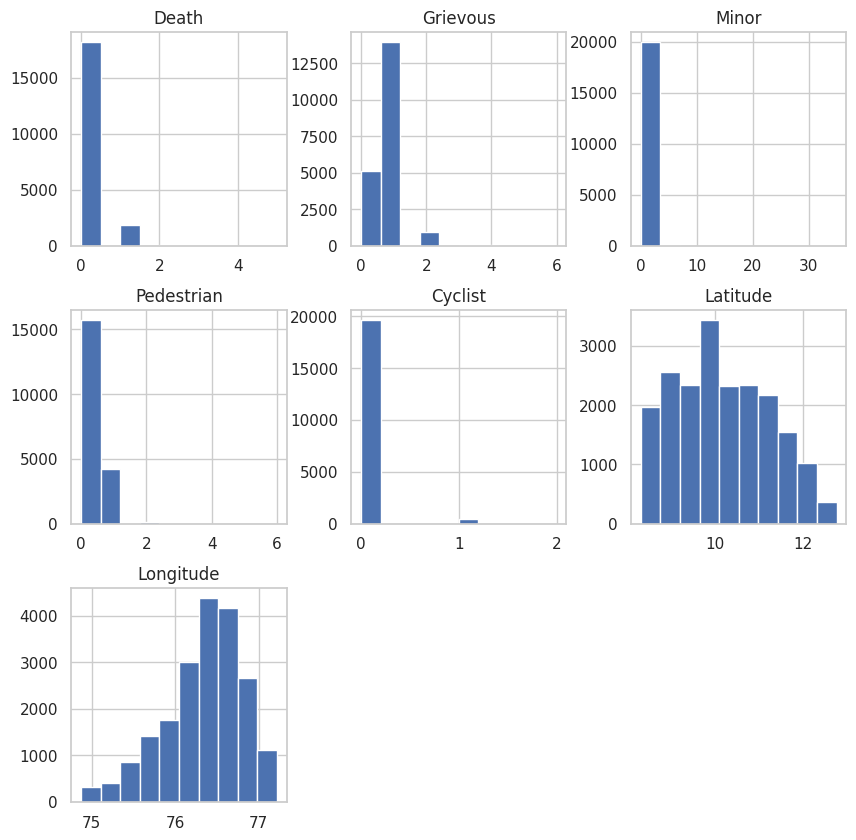

In [ ]:
histplot=data.hist(figsize=(10,10))

In [ ]:
#Extract numerical columns
numerical_columns= data.select_dtypes(include=['number']).columns
numerical_columns

Index(['Death', 'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude',
       'Longitude'],
      dtype='object')

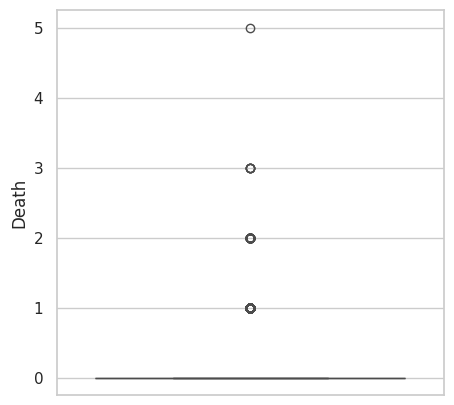

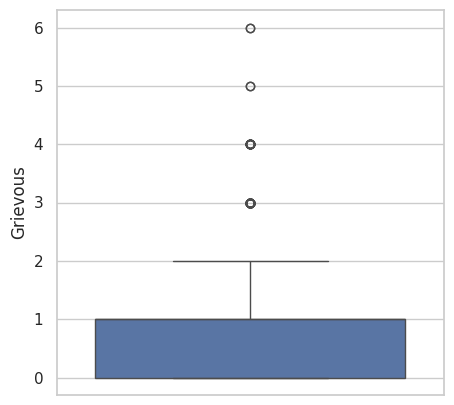

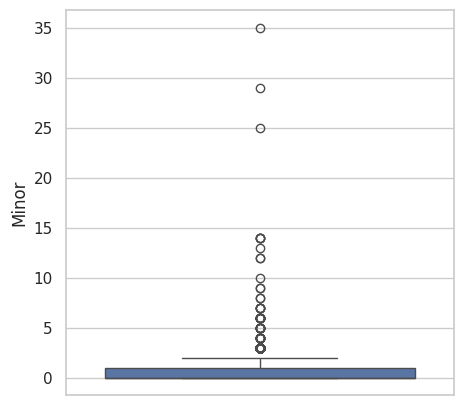

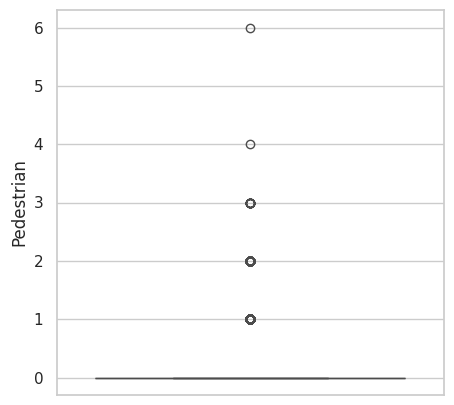

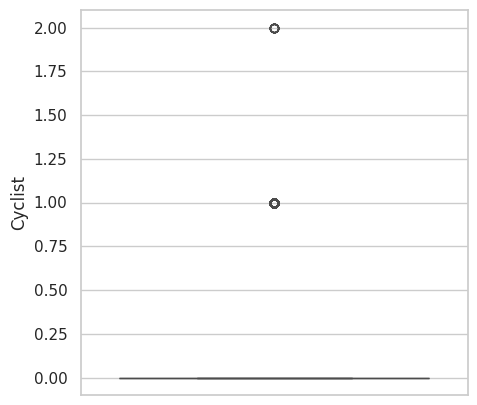

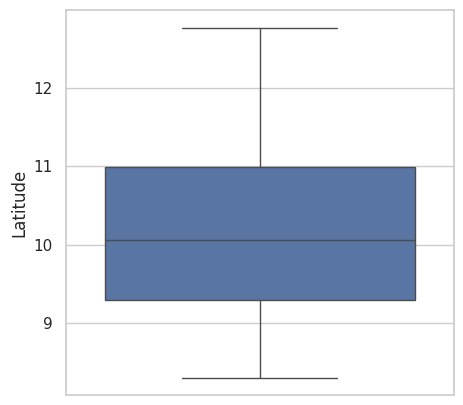

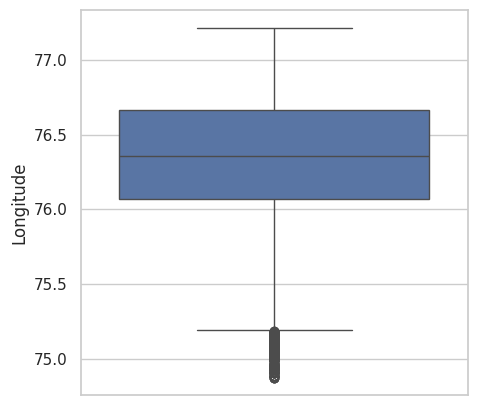

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#checking outliers
for col in numerical_columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(data[col])
  plt.show()


In [ ]:
data['Death'].value_counts()

Death
0    18197
1     1805
2       58
3        5
5        1
Name: count, dtype: int64

In [ ]:
data['Grievous'].value_counts()

Grievous
1    13961
0     5099
2      917
3       58
4       27
5        2
6        2
Name: count, dtype: int64

In [ ]:
data['Minor'].value_counts()

Minor
0     14843
1      4307
2       713
3       130
6        22
4        19
5        12
7         5
14        4
12        2
8         2
9         2
13        1
10        1
29        1
35        1
25        1
Name: count, dtype: int64

In [ ]:
data['Pedestrian'].value_counts()

Pedestrian
0    15706
1     4229
2      112
3       17
4        1
6        1
Name: count, dtype: int64

In [ ]:
data.columns

Index(['District', 'PS Name', 'FIR No', 'Date Report', 'Date Accident',
       'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death',
       'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude',
       'Place of Occurance', 'Type Area', 'City/Town/ Village', 'Lanes Road',
       'Divider', 'Spot Accident', 'Weather', 'Collision', 'Type Road',
       'Road Features', 'Visibility', 'Traffic Control', 'Accussed Vehicle',
       'Victim Vehicle'],
      dtype='object')

In [ ]:
# Group the dataset by 'District', 'Spot Accident', and 'PS Name' to count the number of accidents
accident_counts = data.groupby(['District', 'Spot Accident', 'PS Name']).size().reset_index(name='Accident_Count')

# Sort the results by 'Accident_Count' in descending order
accident_counts = accident_counts.sort_values(by='Accident_Count', ascending=False)

# Display the table
print(accident_counts)



            District           Spot Accident          PS Name  Accident_Count
1721    KOLLAM RURAL           Near bus stop  Kottarakkara PS              51
1013     KANNUR CITY            In Open area     Valapattanam              51
2123  KOZHIKODE CITY  Market/Commercial area     Med. College              48
3015  PATHANAMTHITTA            In Open area      Thiruvalla               48
3918  THRISSUR RURAL            In Open area       Chalakkudy              47
...              ...                     ...              ...             ...
2129  KOZHIKODE CITY  Market/Commercial area         Vellayil               1
2116  KOZHIKODE CITY  Market/Commercial area       Chemmangad               1
2114  KOZHIKODE CITY      Institutional Area         Vellayil               1
2113  KOZHIKODE CITY      Institutional Area   Town Kozhikode               1
4205         WAYANAD                   Other       Thirunelli               1

[4206 rows x 4 columns]


In [ ]:
# Group the dataset by 'District', 'Spot Accident', and 'PS Name' to count the number of accidents
accident_counts = data.groupby(['District', 'Spot Accident', 'PS Name']).size().reset_index(name='Accident_Count')

# Sort the results by 'Accident_Count' in descending order
accident_counts = accident_counts.sort_values(by='Accident_Count', ascending=False)

# Display the table
print(accident_counts)


            District           Spot Accident          PS Name  Accident_Count
1721    KOLLAM RURAL           Near bus stop  Kottarakkara PS              51
1013     KANNUR CITY            In Open area     Valapattanam              51
2123  KOZHIKODE CITY  Market/Commercial area     Med. College              48
3015  PATHANAMTHITTA            In Open area      Thiruvalla               48
3918  THRISSUR RURAL            In Open area       Chalakkudy              47
...              ...                     ...              ...             ...
2129  KOZHIKODE CITY  Market/Commercial area         Vellayil               1
2116  KOZHIKODE CITY  Market/Commercial area       Chemmangad               1
2114  KOZHIKODE CITY      Institutional Area         Vellayil               1
2113  KOZHIKODE CITY      Institutional Area   Town Kozhikode               1
4205         WAYANAD                   Other       Thirunelli               1

[4206 rows x 4 columns]


In [ ]:
# Group by relevant features to get accident counts
accident_counts = data.groupby(['District', 'Spot Accident','PS Name']).size().reset_index(name='Accident_Count')

In [ ]:
accident_counts.head(10)

District              Spot Accident          PS Name  Accident_Count
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1
2  ALAPPUZHA     At pedestrian crossing         Harippad               1
3  ALAPPUZHA               In Open area  Alappuzha North              15
4  ALAPPUZHA               In Open area  Alappuzha South              20
5  ALAPPUZHA               In Open area      Ambalapuzha              19
6  ALAPPUZHA               In Open area            Aroor              20
7  ALAPPUZHA               In Open area        Arthinkal               5
8  ALAPPUZHA               In Open area       Chengannur              32
9  ALAPPUZHA               In Open area        Cherthala              26

In [ ]:
accident_counts['Accident_Count'].unique()

array([ 1, 15, 20, 19,  5, 32, 26, 10, 17,  3, 13, 34,  9,  8, 11, 12, 14,
        4,  2, 27,  7,  6, 23, 28, 18, 31, 22, 24, 16, 21, 30, 41, 25, 45,
       51, 38, 35, 29, 40, 48, 44, 42, 46, 33, 37, 47])

In [ ]:
accident_counts['Accident_Count'].value_counts()

Accident_Count
1     1261
2      740
3      509
4      331
5      250
6      209
7      138
8      120
9       88
10      81
11      75
12      58
13      53
14      41
15      36
17      34
16      29
19      22
18      16
22      10
25       9
20       8
23       8
26       7
21       6
24       6
28       6
31       6
27       6
35       5
34       5
30       4
38       4
29       4
41       3
32       2
45       2
51       2
48       2
46       2
33       2
37       2
40       1
44       1
42       1
47       1
Name: count, dtype: int64

In [ ]:
# Manually assign clusters based on your criteria with descriptive labels
def assign_manual_cluster(accident_count):
    if accident_count <= 5:
        return 1, "Low incident area"

    else:
        return 2, "Hotspot"


In [ ]:
# Apply the modified function to create clusters and labels
accident_counts[['Cluster', 'Label']] = accident_counts['Accident_Count'].apply(assign_manual_cluster).apply(pd.Series)
accident_counts[['Cluster', 'Label']]

Cluster              Label
0           1  Low incident area
1           1  Low incident area
2           1  Low incident area
3           2            Hotspot
4           2            Hotspot
...       ...                ...
4201        1  Low incident area
4202        1  Low incident area
4203        1  Low incident area
4204        1  Low incident area
4205        1  Low incident area

[4206 rows x 2 columns]



```
# This is formatted as code
```

Low Incident  area

In [ ]:
accident_counts[accident_counts['Label'] == "Low incident area"].head(5)

District              Spot Accident      PS Name  Accident_Count  \
0   ALAPPUZHA  Affected by encroachments   Mavelikara               1   
1   ALAPPUZHA     At pedestrian crossing   Chengannur               1   
2   ALAPPUZHA     At pedestrian crossing     Harippad               1   
7   ALAPPUZHA               In Open area    Arthinkal               5   
12  ALAPPUZHA               In Open area  Kanakakunnu               3   

    Cluster              Label  
0         1  Low incident area  
1         1  Low incident area  
2         1  Low incident area  
7         1  Low incident area  
12        1  Low incident area



```
# This is formatted as code
```
Hotspots

In [ ]:
accident_counts[accident_counts['Label'] == "Hotspot"].head(10)

District Spot Accident           PS Name  Accident_Count  Cluster  \
3   ALAPPUZHA  In Open area   Alappuzha North              15        2   
4   ALAPPUZHA  In Open area   Alappuzha South              20        2   
5   ALAPPUZHA  In Open area       Ambalapuzha              19        2   
6   ALAPPUZHA  In Open area             Aroor              20        2   
8   ALAPPUZHA  In Open area        Chengannur              32        2   
9   ALAPPUZHA  In Open area         Cherthala              26        2   
10  ALAPPUZHA  In Open area           Edathua              10        2   
11  ALAPPUZHA  In Open area          Harippad              17        2   
13  ALAPPUZHA  In Open area  Kareelakulangara              13        2   
14  ALAPPUZHA  In Open area        Kayamkulam              13        2   

      Label  
3   Hotspot  
4   Hotspot  
5   Hotspot  
6   Hotspot  
8   Hotspot  
9   Hotspot  
10  Hotspot  
11  Hotspot  
13  Hotspot  
14  Hotspot

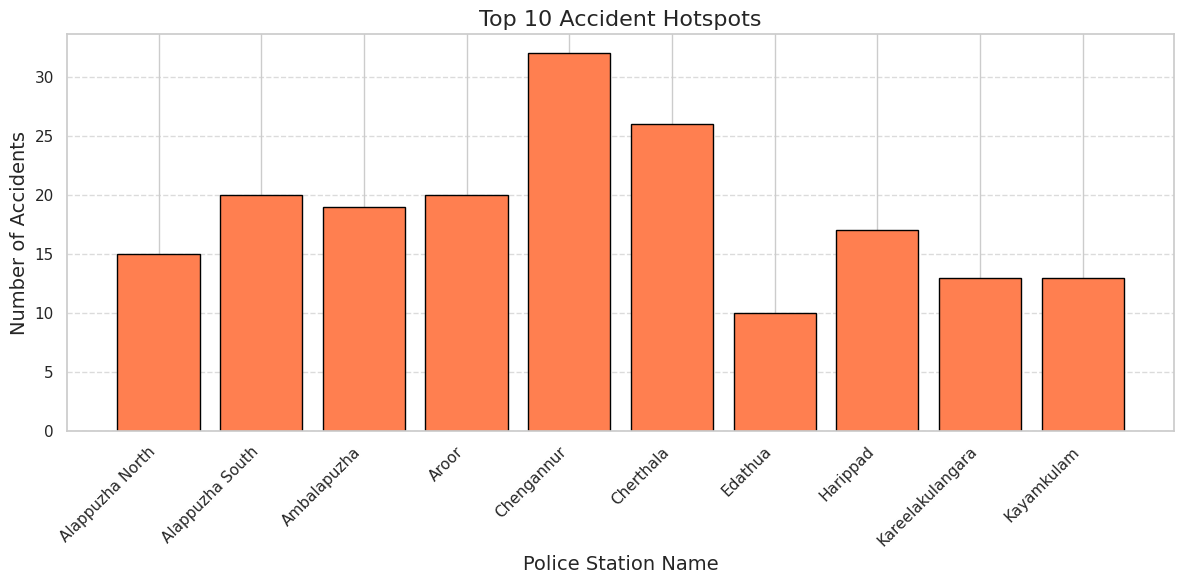

In [ ]:
import matplotlib.pyplot as plt

# Filter for hotspots and get the top 10 entries
hotspot_data = accident_counts[accident_counts['Label'] == "Hotspot"].head(10)

# Plotting the bar graph for the top 10 hotspots
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(hotspot_data['PS Name'], hotspot_data['Accident_Count'], color='coral', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Accident Hotspots', fontsize=16)
plt.xlabel('Police Station Name', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


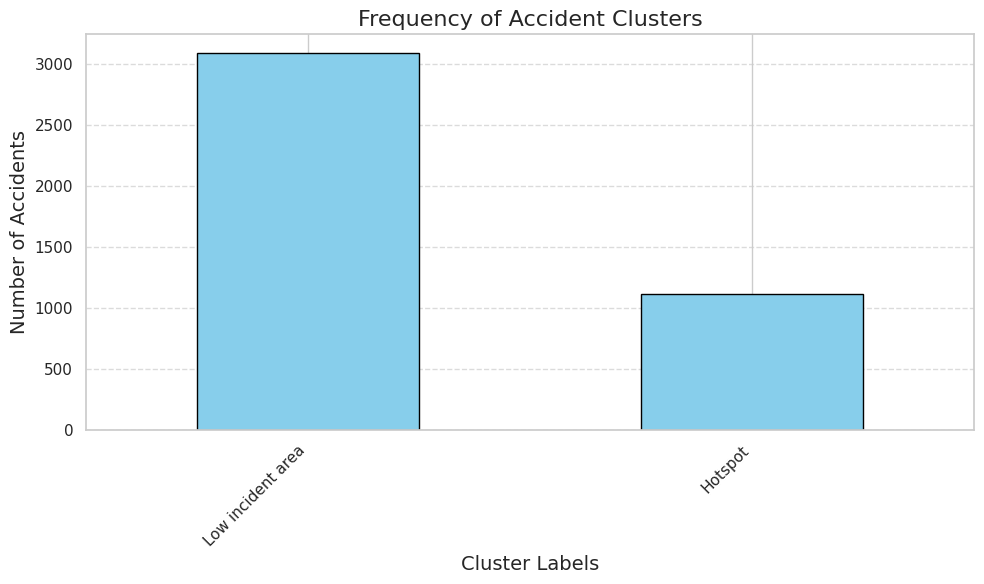

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar graph for the 'Label' column
plt.figure(figsize=(10, 6))  # Set the figure size
accident_counts['Label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Frequency of Accident Clusters', fontsize=16)
plt.xlabel('Cluster Labels', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


In [ ]:
accident_counts['Cluster'].value_counts()

Cluster
1    3091
2    1115
Name: count, dtype: int64

In [ ]:
accident_counts.shape

(4206, 6)

In [ ]:
accident_counts.head()

District              Spot Accident          PS Name  Accident_Count  \
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1   
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1   
2  ALAPPUZHA     At pedestrian crossing         Harippad               1   
3  ALAPPUZHA               In Open area  Alappuzha North              15   
4  ALAPPUZHA               In Open area  Alappuzha South              20   

   Cluster              Label  
0        1  Low incident area  
1        1  Low incident area  
2        1  Low incident area  
3        2            Hotspot  
4        2            Hotspot

Encoding

In [ ]:
#target mean encoding District with cluster as target
accident_counts['District_enc'] = accident_counts.groupby('District')['Accident_Count'].transform('mean')
accident_counts['PS Name_enc'] = accident_counts.groupby('PS Name')['Accident_Count'].transform('mean')
accident_counts['Spot Accident_enc'] = accident_counts.groupby('Spot Accident')['Accident_Count'].transform('mean')


In [ ]:
accident_counts.head()

District              Spot Accident          PS Name  Accident_Count  \
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1   
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1   
2  ALAPPUZHA     At pedestrian crossing         Harippad               1   
3  ALAPPUZHA               In Open area  Alappuzha North              15   
4  ALAPPUZHA               In Open area  Alappuzha South              20   

   Cluster              Label  District_enc  PS Name_enc  Spot Accident_enc  
0        1  Low incident area      5.984733     6.111111           1.333333  
1        1  Low incident area      5.984733     8.230769           1.119048  
2        1  Low incident area      5.984733     9.333333           1.119048  
3        2            Hotspot      5.984733     8.181818           9.529018  
4        2            Hotspot      5.984733     9.272727           9.529018

In [ ]:
#one hot encoding District,spot accident and PS Name
#accident_counts = pd.get_dummies(accident_counts, columns=['District', 'Spot Accident', 'PS Name'], drop_first=True)

In [ ]:
accident_counts.head()

District              Spot Accident          PS Name  Accident_Count  \
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1   
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1   
2  ALAPPUZHA     At pedestrian crossing         Harippad               1   
3  ALAPPUZHA               In Open area  Alappuzha North              15   
4  ALAPPUZHA               In Open area  Alappuzha South              20   

   Cluster              Label  District_enc  PS Name_enc  Spot Accident_enc  
0        1  Low incident area      5.984733     6.111111           1.333333  
1        1  Low incident area      5.984733     8.230769           1.119048  
2        1  Low incident area      5.984733     9.333333           1.119048  
3        2            Hotspot      5.984733     8.181818           9.529018  
4        2            Hotspot      5.984733     9.272727           9.529018

In [ ]:
#FALSE AND TRUE TO NUMERICAL
accident_counts = accident_counts.replace({False: 0, True: 1})

In [ ]:
accident_counts.head()

District              Spot Accident          PS Name  Accident_Count  \
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1   
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1   
2  ALAPPUZHA     At pedestrian crossing         Harippad               1   
3  ALAPPUZHA               In Open area  Alappuzha North              15   
4  ALAPPUZHA               In Open area  Alappuzha South              20   

   Cluster              Label  District_enc  PS Name_enc  Spot Accident_enc  
0        1  Low incident area      5.984733     6.111111           1.333333  
1        1  Low incident area      5.984733     8.230769           1.119048  
2        1  Low incident area      5.984733     9.333333           1.119048  
3        2            Hotspot      5.984733     8.181818           9.529018  
4        2            Hotspot      5.984733     9.272727           9.529018

In [ ]:
#create a dataframe containing district and district_enc
district_df = accident_counts[['District', 'District_enc']]
Spot_Accident_df = accident_counts[['Spot Accident', 'Spot Accident_enc']]
PS_Name_df = accident_counts[['PS Name', 'PS Name_enc']]

In [ ]:
#district_df,spot_accident_df,ps_name_df to csv
district_df.to_csv('district_df.csv', index=False)
Spot_Accident_df.to_csv('Spot_Accident_df.csv', index=False)
PS_Name_df.to_csv('PS_Name_df.csv', index=False)

In [ ]:
# Perform encoding on categorical features
#freq_encoded = ['District','Spot Accident', 'PS Name']



In [ ]:


# Apply Frequency Encoding
#for col in freq_encoded:
    # Compute frequency of each category in the column
    #frequency_map = accident_counts[col].value_counts(normalize=True)

    # Map these frequencies to the original column
    #accident_counts[col] = accident_counts[col].map(frequency_map)





In [ ]:
#frequency_map

In [ ]:
# Prepare features (X) and labels (y)
X = accident_counts.drop(['Accident_Count', 'Cluster', 'Label','District','Spot Accident','PS Name'], axis=1)
y = accident_counts['Cluster']

In [ ]:
X

District_enc  PS Name_enc  Spot Accident_enc
0         5.984733     6.111111           1.333333
1         5.984733     8.230769           1.119048
2         5.984733     9.333333           1.119048
3         5.984733     8.181818           9.529018
4         5.984733     9.272727           9.529018
...            ...          ...                ...
4201      3.460870     6.000000           6.945238
4202      3.460870     3.857143           6.945238
4203      3.460870     3.000000           6.945238
4204      3.460870     3.800000           6.945238
4205      3.460870     2.000000           6.945238

[4206 rows x 3 columns]

In [ ]:
X.shape

(4206, 3)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
#model = RandomForestClassifier(random_state=42)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
#model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
#model = RandomForestClassifier(min_samples_leaf=10, min_samples_split=10, random_state=42)




In [ ]:
X_train.columns

Index(['District_enc', 'PS Name_enc', 'Spot Accident_enc'], dtype='object')

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:

# Evaluate the model
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.73%


In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[841  80]
 [138 203]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.91      0.89       921
           2       0.72      0.60      0.65       341

    accuracy                           0.83      1262
   macro avg       0.79      0.75      0.77      1262
weighted avg       0.82      0.83      0.82      1262



In [ ]:
# Function to predict the cluster for new input values including Latitude and Longitude
def predict_cluster(district, ps_name,accident_spot):
    new_input = pd.DataFrame({
        'District': [district],
        'PS Name': [ps_name],
        'Spot Accident': [accident_spot]


    })

    # one hot encoding
    new_input_encoded = pd.get_dummies(new_input, columns=['District', 'PS Name', 'Spot Accident'], drop_first=True)


    # One-hot encode the new input data
    #new_input_encoded = pd.get_dummies(new_input, columns=['District', 'PS Name', 'Spot Accident'], drop_first=True)

    # Align the new input with the training data columns
    new_input_encoded = new_input_encoded.reindex(columns=X.columns, fill_value=0)

    predicted_cluster = model.predict(new_input_encoded)
    return predicted_cluster[0]  # Return the predicted cluster

# Get the prediction for the new input values
district = 'ALAPPUZHA'  # Replace with actual district name
ps_name="Mavelikara	"
accident_spot= 'Affected by encroachments'


predicted_cluster = predict_cluster(district,ps_name, accident_spot)

# Display the result
print(f'Predicted Cluster: {predicted_cluster}')
#print(f'Prediction Probability: {prediction_probability:.2f}%')

Predicted Cluster: 1


In [ ]:
#add latitude and longitude columns from data variable in the account_counts variable
accident_counts['Latitude'] = data['Latitude']
accident_counts['Longitude'] = data['Longitude']
accident_counts.head()

District              Spot Accident          PS Name  Accident_Count  \
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1   
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1   
2  ALAPPUZHA     At pedestrian crossing         Harippad               1   
3  ALAPPUZHA               In Open area  Alappuzha North              15   
4  ALAPPUZHA               In Open area  Alappuzha South              20   

   Cluster              Label  District_enc  PS Name_enc  Spot Accident_enc  \
0        1  Low incident area      5.984733     6.111111           1.333333   
1        1  Low incident area      5.984733     8.230769           1.119048   
2        1  Low incident area      5.984733     9.333333           1.119048   
3        2            Hotspot      5.984733     8.181818           9.529018   
4        2            Hotspot      5.984733     9.272727           9.529018   

    Latitude  Longitude  
0  10.190200  76.200200  
1  10.107051  76.261841  
2   9.942077  76.644036  
3   9.996156  76.593602  
4   9.941782  76.644568

#Map Visualization

In [ ]:
# Create a map to visualize accident hotspots
# Initialize a folium map centered around the mean latitude and longitude
map_center = [accident_counts['Latitude'].mean(), accident_counts['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each accident hotspot
for idx, row in accident_counts.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,  # Circle radius
        color='blue' if row['Cluster'] == 1 else 'red',
        fill=True,
        fill_color='blue' if row['Cluster'] == 1 else 'red' ,
        fill_opacity=0.6,
        popup=f"Accident Count: {row['Accident_Count']}<br>Cluster: {row['Label']}"
    ).add_to(accident_map)

# Save the map to an HTML file
accident_map.save('accident_hotspot_map.html')

# Display the map in a Jupyter Notebook or similar environment
accident_map

In [ ]:
#pickle

import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:


# Assuming accident_counts is your DataFrame after frequency encoding

# Save the DataFrame as a pickle file
pickle_file_path = 'accident_counts_encoded.pkl'
accident_counts.to_pickle(pickle_file_path)

print(f"DataFrame saved as pickle file: {pickle_file_path}")


DataFrame saved as pickle file: accident_counts_encoded.pkl


In [ ]:
# Load the DataFrame from the pickle file
loaded_accident_counts = pd.read_pickle(pickle_file_path)
print(loaded_accident_counts.head())


    District              Spot Accident          PS Name  Accident_Count  \
0  ALAPPUZHA  Affected by encroachments       Mavelikara               1   
1  ALAPPUZHA     At pedestrian crossing       Chengannur               1   
2  ALAPPUZHA     At pedestrian crossing         Harippad               1   
3  ALAPPUZHA               In Open area  Alappuzha North              15   
4  ALAPPUZHA               In Open area  Alappuzha South              20   

   Cluster              Label  District_enc  PS Name_enc  Spot Accident_enc  \
0        1  Low incident area      5.984733     6.111111           1.333333   
1        1  Low incident area      5.984733     8.230769           1.119048   
2        1  Low incident area      5.984733     9.333333           1.119048   
3        2            Hotspot      5.984733     8.181818           9.529018   
4        2            Hotspot      5.984733     9.272727           9.529018   

    Latitude  Longitude  
0  10.190200  76.200200  
1  10.107051  76